In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('data/paper_term.json',lines=True)

In [4]:
df.sample(3)

,abstract,term,title,uuid
1247,Collective decisions can emerge from individua...,"{' model ': 1, ' information ': 6, ' structure...",Collective decision-making by rational agents ...,24352fe0-9533-11ea-a3f8-0242ac1a000b
8534,Biofilms are antibiotic-resistant bacterial ...,"{' structure ': 1, ' behavior ': 1, ' interact...",Differential growth of wrinkled biofilms,205bbbae-885f-11ea-b132-0242ac1a000b
11823,Countries highly exposed to incoming traffic...,"{' model ': 2, ' time ': 1, ' population ': 1,...",A preceding low-virulence strain pandemic indu...,6bbd61ce-c649-11ea-a162-0242ac1a0008


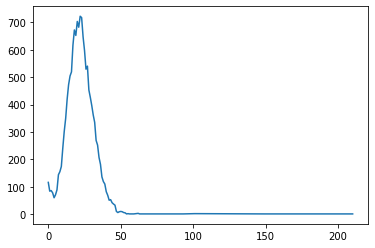

In [5]:
df['term_count'] = df['term'].apply(lambda x:len(x))

from collections import Counter
lyst = list(df['term_count'])
counts = dict(sorted(Counter(lyst).items(),key=lambda x:x[0]))

plt.plot(list(counts.keys()),list(counts.values()))

In [6]:
# 消除嵌套术语
def term_reduce(dic):
    rst = dic.copy()
    for k,v in dic.items():
        for k1,v1 in dic.items():
            if len(k.split()) < len(k1.split()):
                if k.strip() in k1:
                    rst[k] = rst[k] - v1
    rst = {k:v for k,v in rst.items() if v>0}
    return rst

In [7]:
%time df['term_reduce'] = df['term'].apply(lambda x:term_reduce(x))

Wall time: 5.44 s


In [8]:
paper2term = dict(zip(df['uuid'],df['term_reduce']))

In [9]:
### 摘要层级的共现网络
import json

with open('data/term_tuple_3.json','r') as f:
    terms = json.load(f)

In [ ]:
# 每篇术语出现的论文
df_term['uuid'] = df_term['term'].apply(lambda x:[l for l in df2term if x in df2term[l]])

# 术语共现矩阵(摘要层级)
n = len(df_term)
co_cur_abstract = np.zeros((n,n))

for i,row in df_term.iterrows():
    set1 = set(row['uuid'])
    for j in range(i+1,n):
        set2 = set(df_term.loc[j,'uuid'])
        co_cur_abstract[i,j] = len(set1&set2)
        co_cur_abstract[j,i] = co_cur_abstract[i,j]
    if i%1000==0:
        print(i)
        
np.save('data/cocur_abstract.npy',co_cur_abstract)

### 筛选部分论文和术语 2021.01.01

In [48]:
df.sample()

,abstract,term,title,uuid,term_count,term_reduce
13458,Most agent-based models include a social net...,"{' network ': 6, ' algorithm ': 2, ' structure...",Small world is not enough: Criteria for networ...,f4669fa0-4da8-11ea-b566-0242ac1a0007,27,"{' network ': 1, ' algorithm ': 2, ' structure..."


In [49]:
lyst = [l[2] for l in terms.values()]

(array([1.000e+00, 1.400e+01, 1.025e+03, 7.148e+03, 2.943e+03, 1.034e+03,
        2.437e+03, 2.220e+02, 1.010e+02, 1.400e+01]),
 array([0.23373168, 0.30249601, 0.37126033, 0.44002466, 0.50878899,
        0.57755331, 0.64631764, 0.71508196, 0.78384629, 0.85261062,
        0.92137494]),
 <a list of 10 Patch objects>)

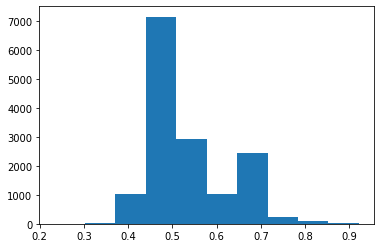

In [50]:
plt.hist(lyst)

In [51]:
# 删掉部分一般性术语   可以根据几何分布参数和出现过的论文篇数来调整
#(1) 几何分布参数大于0.85
del_terms = []
for k,v in terms.items():
    if v[2]>0.85:
        del_terms.append(k)
        print(k,v)
print('\n')        
#（2） 出现过的论文篇数大于1000
for k,v in terms.items():
    if v[1]>1000:
        del_terms.append(k)
        print(k,v)

 result  [6324, 3076, 0.8629008439]
 analysis  [5012, 1293, 0.8570705895]
 paper  [4180, 3241, 0.8903500626]
 structure  [4289, 680, 0.8515560773]
 property  [2701, 475, 0.8564466101]
 function  [2887, 521, 0.8588077040000001]
 term  [1536, 953, 0.8930071927000001]
 gap  [398, 163, 0.8552065990000001]
 aim  [438, 172, 0.9036636195000001]
 nature  [859, 386, 0.8812688093000001]
numerical simulation [477, 335, 0.9213749414]
case study [307, 185, 0.8654548375000001]
large number [300, 249, 0.9043175903]
real world [192, 77, 0.8588423618000001]
numerical experiment [112, 94, 0.8574090119000001]


 model  [17647, 2674, 0.6680431186]
 network  [20189, 1989, 0.5834253493]
 dynamic  [7387, 1324, 0.7640142064000001]
 system  [10781, 1562, 0.6856325257]
 time  [6105, 1440, 0.8086238801000001]
 result  [6324, 3076, 0.8629008439]
 analysis  [5012, 1293, 0.8570705895]
 paper  [4180, 3241, 0.8903500626]
 approach  [4973, 1164, 0.8254729325]
 number  [3916, 1445, 0.7734961371]
 method  [6660, 1566, 0

In [52]:
# 选取论文（使得论文中术语的数量不太少或太多）
mode = 0
for k,v in counts.items():
    if v == max(counts.values()):
        mode = k
print(f'出现{mode}个术语的论文数量最多')

df_demo = df[(df['term_count']>mode-5)&(df['term_count']<mode+5)].copy()
df_demo.shape

出现22个术语的论文数量最多


(5921, 6)

In [53]:
df_demo['term_reduce'] = df_demo['term_reduce'].apply(lambda x:[k for k in x if k not in del_terms])

In [54]:
df_demo.sample()

,abstract,term,title,uuid,term_count,term_reduce
13708,We consider the problem of a semiclassical d...,"{' approach ': 1, ' number ': 1, ' problem ': ...",Semiclassical treatment of quantum chaotic tra...,6b277328-e113-11ea-bad9-0242ac1a000a,19,"[ probability , quantum , transport , treat..."


In [63]:
# 用向量表示
term2id = {}
i = 0
for item in df_demo['term_reduce']:
    for l in item:
        if l not in term2id:
            term2id[l] = i
            i += 1

def one_hot(term_lyst,term2id):
    lyst = [term2id[l] for l in term_lyst]
    one_hot = np.zeros(len(term2id))
    for l in lyst:
        one_hot[l]=1
    return one_hot
        
%time df_demo['vector'] = df_demo.apply(lambda x:one_hot(x['term_reduce'],term2id),axis=1)

Wall time: 1.31 s


In [65]:
df_demo.sample(3)

,abstract,term,title,uuid,term_count,term_reduce,vector
5197,Quantifying lumbar back motion during functi...,"{' system ': 4, ' analysis ': 1, ' study ': 2,...",Measuring lumbar back motion during functional...,1bb17050-88b2-11ea-b132-0242ac1a000b,26,"[ research , motion , measurement , movemen...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2544,Adversarial formulations in machine learning...,"{' analysis ': 1, ' approach ': 1, ' method ':...",LEAD: Least-Action Dynamics for Min-Max Optimi...,33afa528-18db-11eb-a743-0242ac1a000c,20,"[ research , impact , type , convergence , ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
6078,We analyze an intermediate collective regime...,"{' phase ': 2, ' evolution ': 1, ' transition ...",From phase to amplitude oscillators,cf3326f4-88b3-11ea-b132-0242ac1a000b,26,"[ phase , evolution , transition , relation...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [66]:
df_demo.to_json('paper_with_term.json',orient='records',lines=True)